In [2]:
import random
import math 

num_city = 100
num_air = 3
cities = set()
airports = []

for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
   
    
startLocAirPorts = []
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))
    startLocAirPorts.append((x,y))
    



<module 'matplotlib.pyplot' from '/Users/jeronimoreyes/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

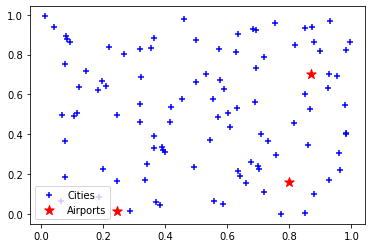

In [3]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [11]:
def closestCitiesSets(cities,airports):
    airportA = set()
    airportB = set()
    airportC = set()
    
    for c in cities:
        distance = math.inf
        airportID = 0
        for i in range(num_air):
            difference = math.hypot(airports[i][0] - c[0], airports[i][1]- c[1])
            if difference < distance:
                distance = difference
                airportID = i + 1
                
        if airportID == 1:
            airportA.add(c)
        elif airportID == 2:
            airportB.add(c)
        else:
            airportC.add(c)
        
    cities_array = [airportA, airportB, airportC]
        
    return cities_array

In [12]:
#takes one set of closest cities 
#print(x[0], x[1])
#print(airport[0], airport[1])
def objective_function(cities, airports):
    value = 0
    
    for i in range(len(airports)):
        for x in cities[i]:
            value = ((x[0]-airports[i][0])**2) + ((x[1]-airports[i][1])**2) + value

    return value

In [13]:
def gradientCalc(cities, airports):
    gradient = []
#   print(type(cities)) #set
#   print(type(airports))# list 

    
    for i in range(num_air): #for each airport 
        x=0
        y=0
        for city in cities[i]:
            x = airports[i][0]-city[0] + x
            y = airports[i][1]-city[1] + y
        gradient.append((2*x, 2*y))
    
    return gradient
    

In [14]:
value = []

citiesSets = closestCitiesSets(cities, airports)
value.append(objective_function(citiesSets, airports))
    
for i in range(1,20):
    
    if(i != 1):
        citiesSets = closestCitiesSets(cities, airports)
    
    gradient = gradientCalc(citiesSets, airports)
    
    a = 0.009
    
    for i in range(num_air):
        x = airports[i][0] - ((a)*gradient[i][0])
        y = airports[i][1] - ((a)*gradient[i][1])
        airports[i] = (x,y)
    
    value.append(objective_function(citiesSets, airports))
    #print(round(value, 3))

print(value)
    


[16.25997066762447, 10.199149302692758, 8.332145040176833, 7.337414658831818, 6.696362940960301, 6.308978772898398, 5.933048282762233, 5.6764252885694715, 5.596363195466037, 5.585149807080978, 5.583009872562685, 5.572636536252027, 5.571505202699422, 5.571345298691713, 5.571321581614136, 5.571317866663003, 5.571317249206362, 5.571317140146812, 5.571317119735422, 5.571317115715285]


<module 'matplotlib.pyplot' from '/Users/jeronimoreyes/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

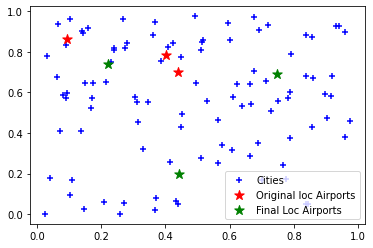

In [15]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')

zip_airs_start = zip(*startLocAirPorts)
plt.scatter(*zip_airs_start, marker='*', color='r', s=100, label='Original loc Airports')

zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='g', s=100, label='Final Loc Airports')

plt.legend()
plt

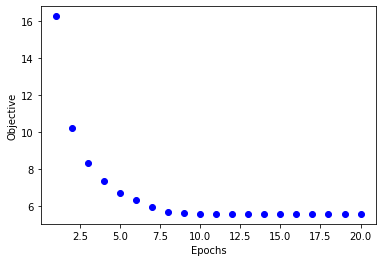

In [16]:
fig1 = plt.figure(1)
plt.plot(range(1,21), value, 'bo')
plt.xlabel("Epochs")
plt.ylabel("Objective")
plt.show()
